In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import phate


scales = pd.read_csv('embeddings_openAI_large_de.csv')

# select the rows of scales where the scaleID field is "NEO" or "PID"
scales = scales[scales['scaleID'].isin(['NEO', 'PID'])]

# form matrix of data
mx = scales.embedding.apply(eval).to_list()
mx = np.asarray(mx)


In [ ]:

phate_operator = phate.PHATE(n_jobs = -2, gamma = -1, decay = 90, knn = 3, t = 2, n_components = 2, 
                             mds_dist='euclidean', mds = 'nonmetric', mds_solver = 'smacof')
Y_phate = phate_operator.fit_transform(mx)


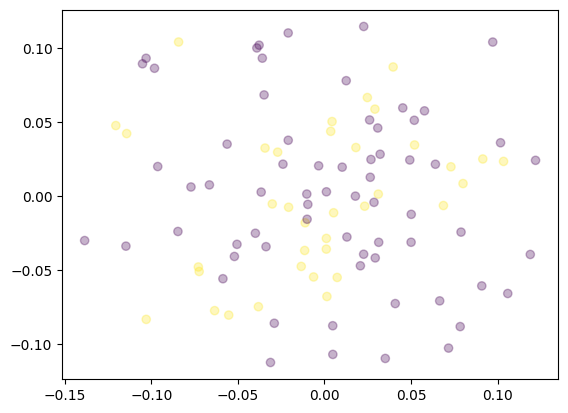

In [3]:
colorcodes = pd.Categorical(scales['scaleID']).codes
plt.scatter(Y_phate[:,0], Y_phate[:,1], alpha = 0.3, c = colorcodes, cmap = 'viridis')


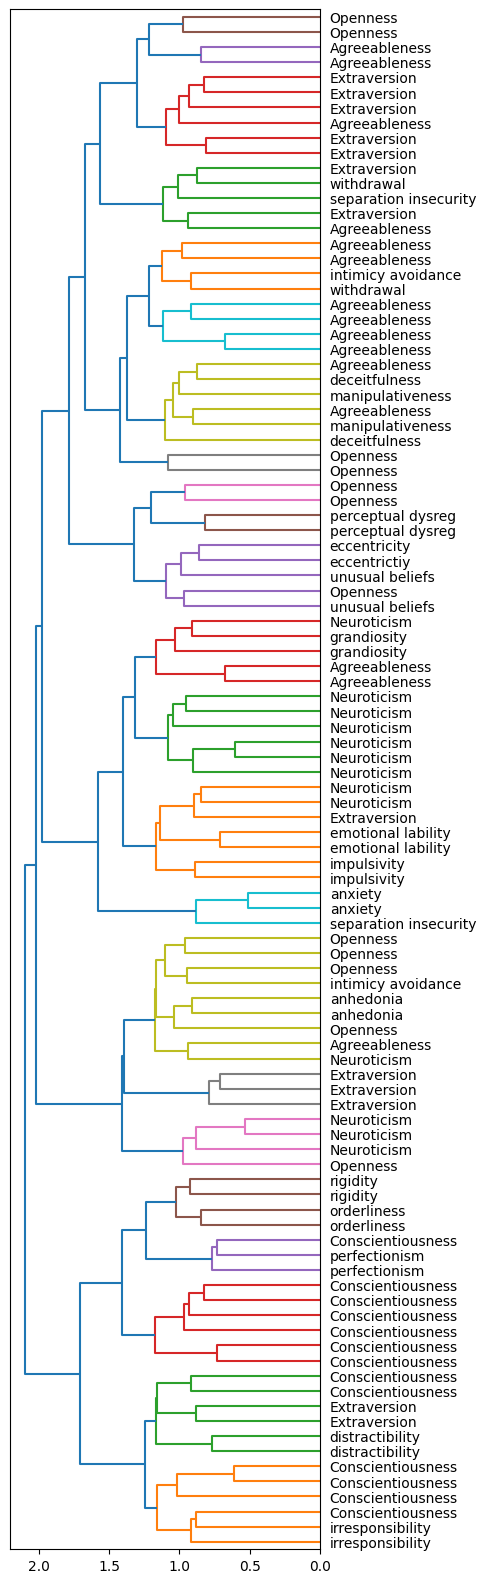

In [21]:
# Create a dendrogram of the similiarity encoded in language embedding
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(mx, 'ward')

# plot the dendrogram using a wide figure and a small font size
plt.figure(figsize=(4, 20))
dn = dendrogram(Z, orientation = "left", labels = scales.type.values, 
                leaf_font_size = 10, color_threshold = 1.2)
plt.show()

In [ ]:
phate_operator = phate.PHATE(n_jobs = -2, gamma = -1, decay = 90, knn = 3, t = 2, n_components = 52, 
                             mds_dist='euclidean', mds = 'nonmetric', mds_solver = 'smacof')
Y_phate = phate_operator.fit_transform(mx)


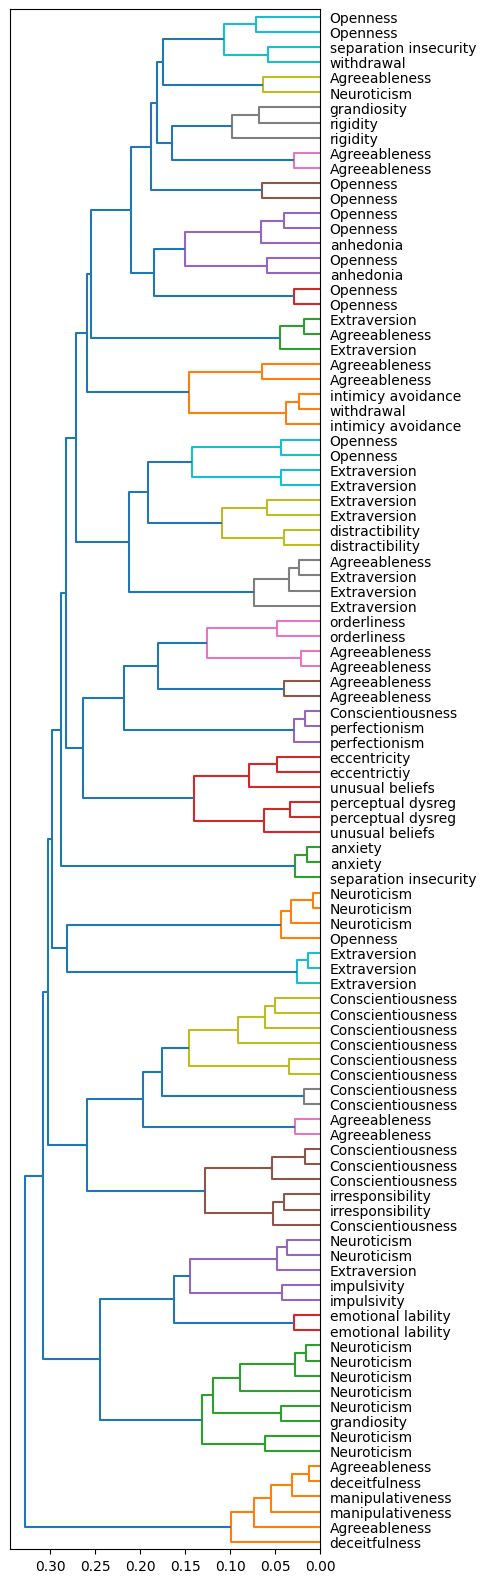

In [6]:

# Create a dendrogram of the similiarity encoded in Y_phate
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(Y_phate, 'ward')

# plot the dendrogram using a wide figure and a small font size
plt.figure(figsize=(4, 20))
dn = dendrogram(Z, orientation = "left", labels = scales.type.values, 
                leaf_font_size = 10, color_threshold = 0.15)
plt.show()